In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
train=pd.read_excel('/content/Train_dataset.xlsx')
test=pd.read_excel('/content/Test_dataset.xlsx')


In [3]:
print(train.shape)
train.head()

(7383, 15)


,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [4]:
print(test.shape)
test.head()

(3331, 14)


,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [5]:
y=train['Stock Price']
y.head()

0     156.987852
1     560.859622
2    1279.732874
3    1121.787632
4     382.962534
Name: Stock Price, dtype: float64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [6]:
df=pd.concat([train, test], axis=0)
print(df.shape)
df.head()

(10714, 15)


,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [7]:
df.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
count,10664.000000,10381.000000,10378.000000,10188.000000,1.039800e+04,10285.000000,10307.000000,10517.000000,10494.000000,10200.000000,10551.000000,7383.000000
mean,486.930280,24477.860693,54.602065,105.301411,1.034401e+07,5.432357,0.140150,0.038448,33.829607,0.943045,4.998525,569.522650
std,279.294087,19689.588363,25.959752,54.971155,5.676256e+06,1.660047,0.384902,0.013345,33.939752,0.202368,2.616892,423.896621
min,5.250000,3351.280000,10.010000,10.020000,5.244620e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,10.573482
25%,244.630000,11270.150000,32.275000,57.900000,5.486451e+06,4.010000,0.030000,0.027000,1.000000,0.770000,2.750000,223.516594
50%,488.395000,12765.840000,54.460000,105.335000,1.038880e+07,5.440000,0.110000,0.038500,17.700000,0.940000,5.010000,458.716483
75%,727.707500,38182.080000,77.317500,153.070000,1.521699e+07,6.860000,0.230000,0.050100,74.900000,1.120000,7.220000,827.927051
max,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1970.400563


JSE        2212
NSE        2164
NYSE       2151
BSE        2095
S&P 500    2092
Name: Index, dtype: int64

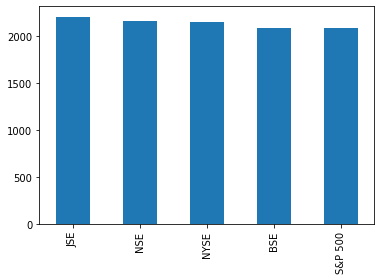

In [8]:
df['Index'].value_counts().plot(kind='bar')
df['Index'].value_counts()

Energy              2211
Materials           2166
Real Estate         2148
Information Tech    2123
Healthcare          2066
Name: Industry, dtype: int64

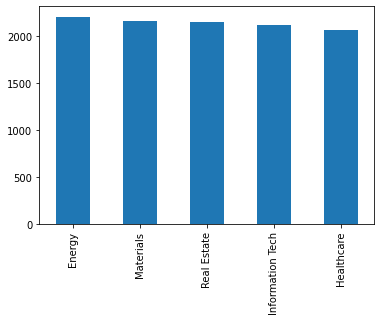

In [9]:
df['Industry'].value_counts().plot(kind='bar')
df['Industry'].value_counts()

55722.00    2138
12765.84    2092
11270.15    2087
38182.08    2042
3351.28     2022
Name: General Index, dtype: int64

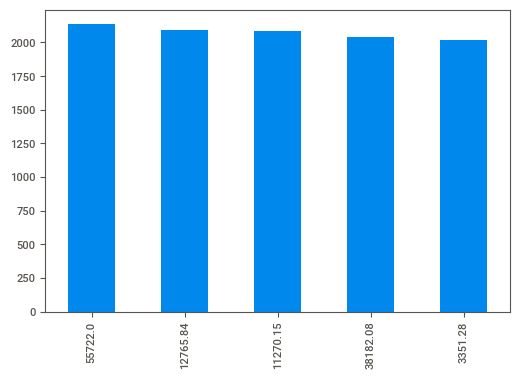

In [14]:
df['General Index'].value_counts().plot(kind='bar')
df['General Index'].value_counts()

 0.11    2115
 0.03    2092
 0.23    2056
-0.43    2048
 0.78    1996
Name: Covid Impact (Beta), dtype: int64

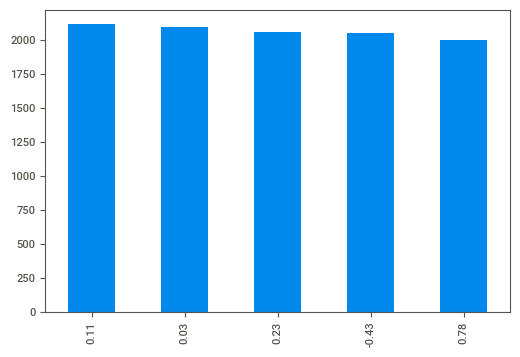

In [17]:
df['Covid Impact (Beta)'].value_counts().plot(kind='bar')
df['Covid Impact (Beta)'].value_counts()

74.9    4174
1.0     4161
17.7    2159
Name: Dollar Exchange Rate, dtype: int64

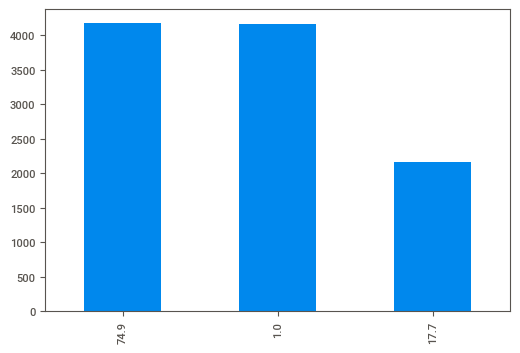

In [16]:
df['Dollar Exchange Rate'].value_counts().plot(kind='bar')
df['Dollar Exchange Rate'].value_counts()

Text(0.5, 1.0, 'Scatter plot ')

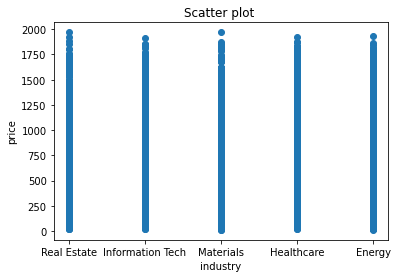

In [11]:
plt.scatter(train['Industry'],train['Stock Price'])
plt.xlabel('industry')
plt.ylabel('price')
plt.title('Scatter plot ')

In [12]:
#! pip install sweetviz
import sweetviz
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Stock Price")

:FEATURES DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [13]:
my_report.show_html("flipr.html") # Not providing a filename will default to SWEETVIZ_REPORT.html

Report flipr.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


**basic model**

In [265]:
train=pd.read_excel('/content/Train_dataset.xlsx')
test=pd.read_excel('/content/Test_dataset.xlsx')

In [266]:
train.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [267]:
y=train['Stock Price']
train=train.drop(['Stock Index','Stock Price'],axis=1)
test=test.drop(['Stock Index'],axis=1)

In [268]:
train.shape

(7383, 13)

In [269]:
test.shape

(3331, 13)

In [270]:
train.head(3)

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20
1,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91
2,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09


In [271]:
train=train.ffill(axis = 0)
test=test.ffill(axis=0)

In [272]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 7383 non-null   object 
 1   Industry              7383 non-null   object 
 2   VWAP                  7383 non-null   float64
 3   General Index         7383 non-null   float64
 4   NAV                   7383 non-null   float64
 5   P/E Ratio             7383 non-null   float64
 6   Volumes Traded        7383 non-null   float64
 7   Inventory Turnover    7383 non-null   float64
 8   Covid Impact (Beta)   7383 non-null   float64
 9   Tracking Error        7383 non-null   float64
 10  Dollar Exchange Rate  7383 non-null   float64
 11  Put-Call Ratio        7383 non-null   float64
 12  P/B Ratio             7383 non-null   float64
dtypes: float64(11), object(2)
memory usage: 750.0+ KB


In [273]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 3331 non-null   object 
 1   Industry              3331 non-null   object 
 2   VWAP                  3331 non-null   float64
 3   General Index         3331 non-null   float64
 4   NAV                   3331 non-null   float64
 5   P/E Ratio             3331 non-null   float64
 6   Volumes Traded        3331 non-null   float64
 7   Inventory Turnover    3331 non-null   float64
 8   Covid Impact (Beta)   3331 non-null   float64
 9   Tracking Error        3331 non-null   float64
 10  Dollar Exchange Rate  3331 non-null   float64
 11  Put-Call Ratio        3331 non-null   float64
 12  P/B Ratio             3331 non-null   float64
dtypes: float64(11), object(2)
memory usage: 338.4+ KB


In [274]:
train= pd.get_dummies(train, columns=['Index','Industry','General Index','Covid Impact (Beta)','Dollar Exchange Rate'])
train.head()

,VWAP,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Tracking Error,Put-Call Ratio,P/B Ratio,Index_BSE,Index_JSE,Index_NSE,Index_NYSE,Index_S&P 500,Industry_Energy,Industry_Healthcare,Industry_Information Tech,Industry_Materials,Industry_Real Estate,General Index_3351.28,General Index_11270.15,General Index_12765.84,General Index_38182.08,General Index_55722.0,Covid Impact (Beta)_-0.43,Covid Impact (Beta)_0.03,Covid Impact (Beta)_0.11,Covid Impact (Beta)_0.23,Covid Impact (Beta)_0.78,Dollar Exchange Rate_1.0,Dollar Exchange Rate_17.7,Dollar Exchange Rate_74.9
0,700.29,32.38,45.35,1208599.0,5.05,0.0520,0.61,9.20,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,214.52,33.25,170.56,13753356.0,3.10,0.0164,0.61,6.91,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,943.42,88.27,143.58,6892003.0,7.70,0.0396,0.61,6.09,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,828.13,73.66,151.76,8316793.0,4.80,0.0431,1.11,5.60,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,828.13,23.79,151.76,3943312.0,8.06,0.0244,1.07,9.46,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0


In [275]:
train.shape

(7383, 31)

In [276]:
test= pd.get_dummies(test, columns=['Index','Industry','General Index','Covid Impact (Beta)','Dollar Exchange Rate'])
test.head()

,VWAP,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Tracking Error,Put-Call Ratio,P/B Ratio,Index_BSE,Index_JSE,Index_NSE,Index_NYSE,Index_S&P 500,Industry_Energy,Industry_Healthcare,Industry_Information Tech,Industry_Materials,Industry_Real Estate,General Index_3351.28,General Index_11270.15,General Index_12765.84,General Index_38182.08,General Index_55722.0,Covid Impact (Beta)_-0.43,Covid Impact (Beta)_0.03,Covid Impact (Beta)_0.11,Covid Impact (Beta)_0.23,Covid Impact (Beta)_0.78,Dollar Exchange Rate_1.0,Dollar Exchange Rate_17.7,Dollar Exchange Rate_74.9
0,53.30,44.59,185.09,12067855.0,2.78,0.0330,0.80,4.66,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,749.34,74.20,34.01,6172474.0,6.78,0.0464,0.86,6.11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,567.75,88.41,177.40,17472488.0,4.36,0.0401,0.93,4.99,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,646.78,79.36,105.44,15553159.0,2.77,0.0187,1.09,1.26,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,380.33,19.90,139.40,12525784.0,5.93,0.0261,1.09,6.18,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [277]:
y=y.values
y=y.reshape(-1,1)
y.shape

(7383, 1)

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)

In [279]:
test=test.iloc[:,:].values

In [280]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
test= sc_X.transform(test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [281]:
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

***model***

In [282]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [283]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [285]:
y_pred=pd.DataFrame(y_pred)
y_test=pd.DataFrame(y_test)
np.mean(np.abs((y_test - y_pred) / y_test))*100

0    12.888178
dtype: float64

**model**

In [286]:
#import xgboost.XGBRegressor
from xgboost import XGBRegressor
regressor=XGBRegressor(n_estimators=1300,reg_lambda=0.12,max_depth=4,learning_rate=0.01)
regressor.fit(X_train, y_train)

[16:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0.12, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [287]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [288]:
y_pred=pd.DataFrame(y_pred)
y_test=pd.DataFrame(y_test)

In [289]:
err= mean_absolute_percentage_error(y_test, y_pred)
err

0    8.427235
dtype: float64

In [290]:
np.mean(np.abs((y_test - y_pred) / y_test))

0    0.084272
dtype: float64

In [291]:
f=pd.concat([y_pred,y_test],axis=1)
f.head(30)

,0,0
0,1542.912964,1540.216032
1,83.811996,80.043190
2,833.398987,873.363631
3,210.944107,206.603635
4,107.692825,82.067902
5,376.552612,401.178828
6,422.010284,388.593289
7,914.969177,914.096278
8,141.347794,140.719936
9,176.845261,184.849257


In [295]:
y_t = regressor.predict(test)
y_t = sc_y.inverse_transform(y_t)
sub=pd.read_excel('/content/Test_dataset.xlsx')
sub=pd.DataFrame(sub['Stock Index'])
sub.head()

,Stock Index
0,AC3235
1,AC3236
2,AC3237
3,AC3238
4,AC3239


In [296]:
sub['Stock Price']=y_t
sub.head()

,Stock Index,Stock Price
0,AC3235,816.097229
1,AC3236,309.454803
2,AC3237,1553.574707
3,AC3238,827.103394
4,AC3239,293.704437


In [297]:
sub.to_csv("sp10t-1.csv",index=False)

In [298]:
sol=pd.read_csv('/content/sp10t-1.csv')

In [299]:
sol.head()

,Stock Index,Stock Price
0,AC3235,816.09720
1,AC3236,309.45480
2,AC3237,1553.57470
3,AC3238,827.10340
4,AC3239,293.70444
